# Воркшоп по поиску аномалий во временных рядах на примере детектирования поломок оборудования

## 1. Теория о задаче поиска аномалий во временных рядах

### 1.1 Основные термины и постановка задачи

**Временные ряды** - это одномерные или многомерные данные, наблюдаемые во времени в последовательном порядке. В особом случае данные наблюдают через заранее определенные и равноотстоящие промежутки времени (например, ежегодно, ежемесячно, ежеквартально или ежечасно)

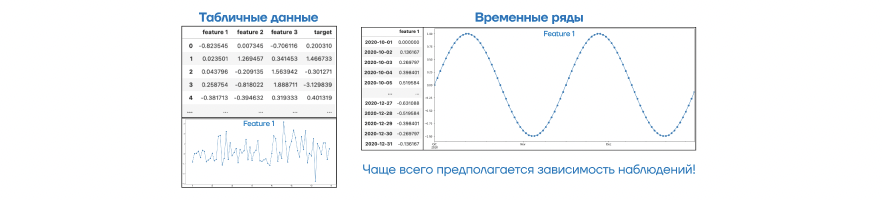

**Поиск аномалий** - это задача обнаружить необычное поведение временного ряда, или несвойственное поведение для процесса. Наглядно примеры аномалий представлены на картинке:

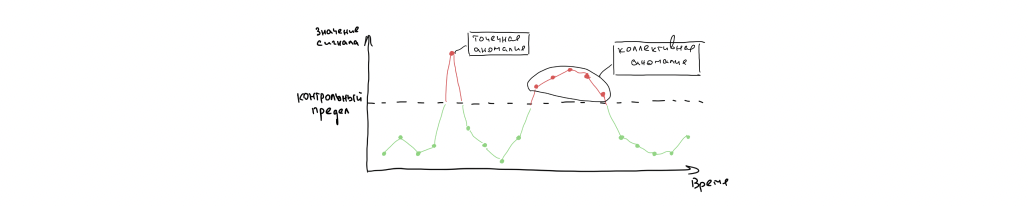

### 1.2 Классификация аномалий

В зависимости от разных характеристик, аномалии могут выражаться и называться по-разному. Классификация аномалий в зависимости от типов данных, доменной области и количества точек представлена на рисунке ниже:

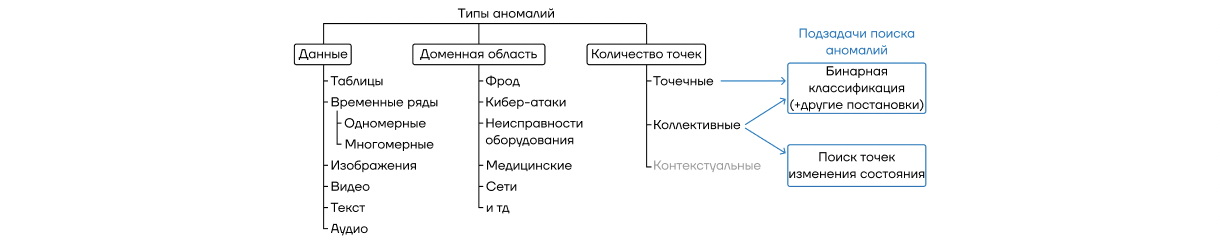

### 1.3 Типы аномалий в зависимости от количества точек

Во временных рядах (и других последовательностях) бывает важно искать не отдельные выбросы, а целые группы последовательных аномальных точек, которые могут представлять собой изменение поведение объекта и тд. При этом, по количеству точек аномалии классифицируют на точечные (point), коллективные (collective) ([Chandola, 2009](https://conservancy.umn.edu/bitstream/handle/11299/215731/07-017.pdf?sequence=1)):
- Точечная аномалия - это аномалия, возникающая в виде отдельной точки, считающейся аномальной по отношению к остальной части данных.
- Коллективная аномалия — это аномалия, возникающая в виде последовательности временных точек, когда между началом и концом аномалии не существует неаномальных (нормальных) данных.
В таком случае именно точечные аномалии можно называть выбросами (outliers), так как согласно Aggarwal, 2016 выбросы - это индивидуальные точки, отличающиеся от остальных данных (=точечные аномалии). Существуют также контекстуальные (contextual) аномалии, но к этому типу могут относиться как точечные, так и коллективные аномалии, если аномальность точек заметна только в контексте (данных поблизости).

### 1.4 Формулировки задач

В зависимости от типов аномалий могут формулироваться различные математические задачи. Это важно, потому что для решения этих задач могут использоваться совсем разные подходы. Задачи в зависимости от типов аномалий бывают следующие:
- Точечные аномалии (выбросы). При решении задачи детекции точечных аномалий мы будем формулировать задачу отнесения каждой точки к нормальному или аномальному классу, то есть задачу бинарной классификации. Но задача не всегда supervised, тогда ее называют и задачей поиска выбросов (outlier detection), и кластеризацией, и одноклассовой классификацией.
- Коллективные аномалии. Для коллективных аномалий мы чаще всего формулируем задачу обнаружения точки изменения состояния (сhangepoint detection). Подробно задача changepoint detection на python разобрана в [этом докладе](https://pycon.ru/poisk-tochek-izmeneniya-sostoyaniya-changepoint-detection-na-python). Однако, в зависимости от постановки бизнес-задачи и прочих условий, мы можем интерпретировать коллективную аномалию как набор точечных аномалий (пусть и последовательных), и тогда ставится задача бинарной классификации.
Другими словами, алгоритмы обнаружения точки изменения состояния применимы только для коллективных аномалий, потому что необходимо найти конкретную точку изменения состояния (change point), где эта коллективная аномалия начинается (или заканчивается). При этом алгоритмы бинарной классификации (кластеризации, поиска выбросов и тд) применимы для обоих типов аномалий, потому что мы можем представлять коллективную аномалию как набор точечных аномалий.

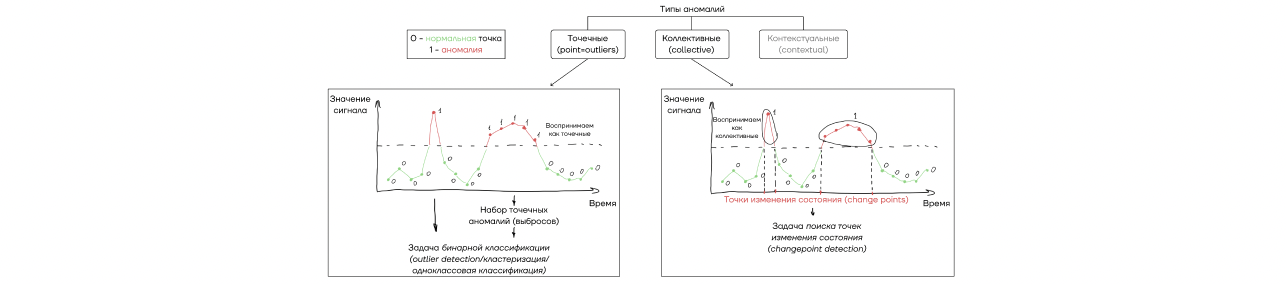

Кстати, подробно про метрики оценки качества решения задач поиска аномалий можно прочитать в [этой статье](https://habr.com/ru/companies/rosatom/articles/687270/).

### 1.5 Библиотеки для решения задач поиска аномалий

Довольно подробная и классификация методов решения задачи поиска аномалий в общем случае представлена в уже упомянутой статье ([Chandola, 2009](https://conservancy.umn.edu/bitstream/handle/11299/215731/07-017.pdf?sequence=1)). Нам же больше интересно, какие инструменты есть для решения различных постановок задач поиска аномалий (с фокусом на временных рядах):
- (Задача поиска выбросов) Библиотека PyOD GitHub-репозиторий. Библиотека помогает обнаружить в данных точечные аномалии или выбросы. В библиотеки реализовано более 30 алгоритмов, начиная с классических алгоритмов типа Isolation Forest и заканчивая недавно представленными в научных статьях методами, типа COPOD и другие.
- (Задача онлайн поиск точек изменения состояния) Библиотека Prophet https://github.com/facebook/prophet. Библиотека прославилась решением задачи прогнозирования временных рядов, но позже появилась возможность решать задачу поиска аномалий.
- (Задача оффлайн поиска точек изменения состояния) Библиотека Ruptures https://github.com/deepcharles/ruptures . В библиотеке реализованы основные методы, решающие задачу и описанные в фундаментальной обзорной статье Truong, 2020 [PDF] arxiv.org.
Упоминания достойны еще несколько репозиториев:
- Библиотека Kats https://github.com/facebookresearch/Kats 
- Библиотека Merlion https://github.com/salesforce/Merlion
- Библиотека Alibi Detect https://github.com/SeldonIO/alibi-detect 
- Бенчмарк NAB https://github.com/numenta/NAB

### 1.6 Методы поиска аномалий

Методов и алгоритмов поиска аномалий существует большое количество. Подробнее о разных классах и алгоритмах можно почитать в научных обзорах, например, в этом:
```
Schmidl, Sebastian, Phillip Wenig, and Thorsten Papenbrock. "Anomaly detection in time series: a comprehensive evaluation." Proceedings of the VLDB Endowment 15.9 (2022): 1779-1797.
```

### 1.7 Полезные материалы
Я создал телеграм канал [DataKatser](https://t.me/DataKatser), где я делюсь своими мыслями и интересными кейсами по data science, машинному обучению и искусственному интеллекту.

Также можно заглянуть в мой [cheatsheet](https://github.com/YKatser/DS-links) репозиторий по data science. Он создавался для личного пользования, поэтому там довольно специфично отобраны материалы, однако по временным рядам, промышленности и поиску аномалий можно найти что-то интересное.

## 2. Исходные данные и задача

### 2.1 Описание установки

Стенд представляет собой водяной насос с замкнутым контуром, системой электропитания, системами управления, сбора данных и мониторинга, построенных с применением технологий промышленного интернета вещей.
Стенд состоит из следующих систем:

1. Система циркуляции воды.
2. Система управления системой циркуляции воды.
3. Система мониторинга состояния системы циркуляции воды.
4. Система демонстрации технологии Time-Sensitive Networking (TSN).
5. Система сбора, обработки и визуализации данных.

Система циркуляции воды предназначена для имитации системы водоснабжения в лабораторных условиях и обеспечивает циркуляцию воды по водяным трубам путем использования водяного насоса.
Система циркуляции воды обеспечивает имитацию следующих неполадок:

- Введение дисбаланса на соединительном вале мотора и водяного насоса.
- Изменение пропускной способности клапана на входе насоса.
- Изменение пропускной способности клапана на выходе насоса.

In [ ]:
from IPython.display import Image
Image(filename="../input/skoltech-anomaly-benchmark-skab-teaser/testbed.png", width=800, height=400)

**Передняя панель и состав систем циркуляции воды, мониторинга, контроля и управления:**

1 - водяной бак; 2 - водяной насос; 3 - электродвигатель; 4 - клапаны; 5 - механический рычаг для обеспечения несоосности валов; 6 - кнопка аварийной остановки. 

**Датчики:**

7 - датчик расхода (NI 9401 8-channel); 8 - датчик давления (NI 9203 8-channel); 9, 10 - вибродатчики (NI 9232 3-channel); 11, 12 - термопары (NI 9213 Spring Terminal 16-channel thermocouple).

### 2.2 Описание датасета

**О датасете**

Датасет, с которым мы будем работать, называется *SKAB teaser*. Он доступен [по ссылке](https://www.kaggle.com/datasets/yuriykatser/skoltech-anomaly-benchmark-skab-teaser). Датасет предназначен для учебных целей и является упрощенной версией датасета SKAB. Полный датасет доступен на [GitHub](https://github.com/waico/SKAB) и [Kaggle](https://www.kaggle.com/yuriykatser/skoltech-anomaly-benchmark-skab).

**Информация**

В данных есть временная отметка записи сигналов:
- datetime - Represents dates and times of the moment when the value is written to the database (YYYY-MM-DD hh:mm:ss)

Данные содержат записи 8ми сигналов с установки:
- Accelerometer1RMS - Shows an absolute vibration acceleration (Amount of g units)
- Accelerometer2RMS - Shows an absolute vibration acceleration (Amount of g units)
- Current - Shows the amperage on the electric motor (Ampere)
- Pressure - Represents the pressure in the loop after the water pump (Bar)
- Temperature - Shows the temperature of the engine body (Degree Celsius)
- Thermocouple - Represents the temperature of the fluid in the circulation loop (Degree Celsius)
- Voltage - Shows the voltage on the electric motor (Volt)
- RateRMS - Represents the circulation flow rate of the fluid inside the loop (Liter per minute)

В данных присутствуют 4 аномалии:  
- РАСЦЕНТРОВКА ВАЛОВ НАСОСА И ДВИГАТЕЛЯ (резко)  
Резкое появление дефекта: 18:39:22  
Резкое отключение дефекта: 18:42:32
- РАСЦЕНТРОВКА ВАЛОВ НАСОСА И ДВИГАТЕЛЯ (медленно)  
Медленное появление дефекта: 18:44:36-18:45:49  
Резкое отключение дефекта: 18:46:51
- ПЕРЕКРЫТИЕ (УМЕНЬШЕНИЕ) ПРОХОДНОГО СЕЧЕНИЯ-1 (верх)  
Медленное появление дефекта: 19:06:57-19:07:37  
Медленное отключение дефекта: 19:10:45-19:11:31
- ПЕРЕКРЫТИЕ (УМЕНЬШЕНИЕ) ПРОХОДНОГО СЕЧЕНИЯ-2 (низ)  
Медленное появление дефекта: 19:14:40-19:16:24  
Медленное отключение дефекта: 19:19:15-19:21:16

### 2.3 Постановка задачи

- **ДС задача с точки зрения бизнеса:** Необходимо обнаруживать возникающие аномалии как можно раньше с момента их появления.

Метрика:
Среднее время запаздывания обнаружения

$\text{ADD} = \frac{1}{|Y|}\sum_{y \in Y} ( \tau_y - \theta_y )$,

где $|Y|$ - суммарное количество точек изменения состояния,  
$\tau_y$ - время обнаружения  
$\theta_y$ - время реального изменения состояния

- **ДС задача с точки зрения математики:** Необходимо построить модель, которая наиболее точно описывает нормальный режим работы установки.

Метрика:
Средняя абсолютная ошибка

$\text{MAE} = \frac{1}{N} \sum^{N}_{i=1}|x_i - \hat{x}_i|$,

где $N$ - общее число значений,  
$x_i$ - правдивое значение в момент времени $i$,  
$\hat{x}_i$ - предсказанное значение в момент времени $i$.

### 2.4 Алгоритм для реализации

Мы будем реализовывать популярный алгоритм *поиска разладки* или *генерации невязки* или *определения расхождения сигналов*. Алгоритм заключается в следующем:
1. Сначала мы строим модель нормального режима работы оборудования (обучение)
2. Потом мы генерируем прогнозы модели (инференс)
3. Потом мы находим разности между прогнозом и реальным значением в каждой точке (эти разности и называют невязкой, разладкой или расхождением)
4. Наконец, мы делаем из разностей один сигнал - индекс или индикатор технического состояния (ИТС)
5. Подбираем для ИТС контрольный предел (UCL) по обучающей или валидационной выборке (главное - на нормальном режиме работы)
6. Сравниваем ИТС в каждой точке с UCL и сигнализируем о нормальном или аномальном состоянии

## 3. Работа с данными

### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Загрузка данных

In [ ]:
# Считывание данных из исходного csv файла
raw_data = pd.read_csv('../input/skoltech-anomaly-benchmark-skab-teaser/SKAB teaser.csv', 
                   sep=';', 
                   index_col='datetime', 
                   parse_dates=True).drop('index',axis=1)

In [ ]:
# Отображение 10 первых строк таблицы
raw_data.head(10)

Необходимо развернуть таблицу, чтобы каждый сигнал являлся колонкой таблицы.

In [ ]:
# Разворачиваем таблицу, приведение к нормальному виду
raw_data = raw_data.pivot_table(values='value', index=raw_data.index, columns='id')

Первые 5 строк таблицы после трансформации выглядят следующим образом:

In [ ]:
# Отображение 5 первых строк таблицы
raw_data.head()

In [ ]:
raw_data.info()

In [ ]:
# Отрисовка графика
raw_data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2');

Обрежем начало данных, чтобы исключить переходный период (разогрев).

In [ ]:
# Обрезка данных
raw_data = raw_data['2019-07-08 17:52:29':]

In [ ]:
# Отрисовка графика
raw_data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2');

In [ ]:
# Сохранение предобработанных данных
# raw_data.to_csv('raw_data.csv')

In [ ]:
# Принт размерности данных
print(f'Размерность данных следующая: {raw_data.shape}')

### Значения признаков

In [ ]:
raw_data.describe()

In [ ]:
# Отрисовка графиков всех сигналов
for name in raw_data.columns:
    raw_data[name].plot(figsize=(12,1), marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title(f'График сигнала: {name}')
    plt.show()

### Дополнительная обработка данных

In [ ]:
# todo
def preprocessing(raw_data):
    data = raw_data.copy()
    
    # your code
    
    return data

data = preprocessing(raw_data=raw_data)

### Разбиение на обучающую, валидационную и тестовую выборки

- Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости.
- Валидационная выборка (validation sample) — выборка, по которой осуществляется выбор наилучшей модели из множества моделей, построенных по обучающей выборке.
- Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество решения задачи.

Описания и варианты определений обучающей, валидационной и тестовой выборок представлены в [статье 1](http://www.machinelearning.ru/wiki/index.php?title=Выборка), [статье 2](https://medium.com/@tekaround/train-validation-test-set-in-machine-learning-how-to-understand-6cdd98d4a764) и др.

[Статья](https://hunch.net/?p=22) о переобучении в машинном обучении.

In [ ]:
# Демонстрация разбиения на обучающую, валидационную и тестовую выборки
data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2')
plt.axvspan(data.index[0], 
            '2019-07-08 18:25', 
            color='green', 
            alpha=0.1, 
            label='Обучающая выборка')
plt.axvspan('2019-07-08 18:25', 
            '2019-07-08 18:35', 
            color='yellow', 
            alpha=0.1, 
            label='Валидационная выборка')
plt.axvspan('2019-07-08 18:35', 
            data.index[-1], 
            color='red', 
            alpha=0.1, 
            label='Тестовая выборка')
plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.xlabel('Время')
plt.ylabel('Значение параметров')
plt.title('Обучающая, валидационная и тестовая выборки');

### Масштабирование (нормализация) данных

Для большинства алгоритмов машинного обучения необходимо, чтобы все признаки были в одном масштабе.

In [ ]:
# Инициализация скэйлера
StSc = StandardScaler()
# Обучение скэйлера на тренировочной выборке
StSc.fit(data[:'2019-07-08 18:25'])

# Применение скэйлера на всех данных
# Преобразование тренировочной выборки
train_sc = StSc.transform(data[:'2019-07-08 18:25'])
# Преобразование валидационной выборки
val_sc = StSc.transform(data['2019-07-08 18:25':'2019-07-08 18:35'])
# Преобразование всей выборки
data_sc = StSc.transform(data)

## 4. Обучение модели нормального режима работы

- Ссылка на курс Keras с бэкэндом TensorFlow: https://youtu.be/qFJeN9V1ZsI

### Импорт необходимых библиотек

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

from itertools import product

### Функция для воспроизводимости результатов

In [ ]:
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

### Описание Автоэнкодера

![ae](https://miro.medium.com/max/700/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

**Автоэнкодер (автокодировщик)** - нейронная сеть, которая копирует входные данные на выход. Автоэнкодеры сжимают входные данные для представления их в скрытое пространство меньшей размерности (бутылочное горлышко), а затем восстанавливают из этого представления выходные данные. Цель — получить на выходном слое отклик, наиболее близкий к входному.

Отличительная особенность автоэнкодеров — количество нейронов на входе и на выходе совпадает.

### Полезные ссылки

- Об автоэнкодере:
https://www.youtube.com/watch?v=H1AllrJ-_30

- Лекция К. Воронцова по искусственным нейронным сетям:
http://www.machinelearning.ru/wiki/images/3/38/Voron-ML-NeuralNets1-2018-slides.pdf

- Презентация к лекции:
http://www.machinelearning.ru/wiki/images/c/cc/Voron-ML-NeuralNets.pdf

- Автоэнкодеры для поиска аномалий:
https://saketsathe.net/downloads/autoencode.pdf

- О слое batch normalization:
https://arxiv.org/pdf/1502.03167v2.pdf

### Архитектура для обучения автоэнкодера

In [ ]:
# Функция для обучения конкретной архитектуры модели
def arch(param, data):
    """
    Обучение конкретной архитектуры

    Parameters
    ----------
    param : list
    
    data : np.array
    """
    Random(0)
    input_dots = Input((8,))

    x = Dense(param[0])(input_dots)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    bottleneck = Dense(param[2], activation='linear')(x)

    x = Dense(param[1])(bottleneck)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[0])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    out = Dense(8, activation='linear')(x)

    model = Model(input_dots, out)
    model.compile(optimizer=Adam(param[3]), loss='mae', metrics=["mse"])
    
#     early_stopping = EarlyStopping(patience=3, verbose=0)
    model.fit(data, data,
                validation_split=0.2,
                epochs=10,
                batch_size=param[4],
                verbose=0,
                shuffle=True,
#                 callbacks=[early_stopping]
               )
    return model

### Обучим случайную модель

In [ ]:
model = arch(param=(6, 5, 4, 0.0001, 30), data=train_sc)

In [ ]:
for i in range(val_sc.shape[1]):
    plt.figure(figsize=(12,1))
    plt.plot(StSc.inverse_transform(val_sc)[:, i], marker='o', markersize=2)
    plt.plot(StSc.inverse_transform(model.predict(val_sc))[:, i], marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

Средняя абсолютная ошибка:

$\text{mae} = \frac{1}{N} \sum^{N}_{i=1}|x_i - \hat{x}_i|$,  
где $N$ - общее число значений, $x_i$ - правдивое значение в момент времени $i$, $\hat{x}_i$ - предсказанное значение в момент времени $i$.

In [ ]:
mean_absolute_error(val_sc, model.predict(val_sc))

### Параметры, которые будем подбирать

In [ ]:
# Выбор сетки параметров для обучения и тестирования
n1=[6, 5]
n2=[4, 3]
n3=[2, 1]
lr=[0.05, 0.01]
batch_size=[32, 64]

parameters = product(n1, n2, n3, lr, batch_size)
parameters_list = list(parameters)
print(f'Total number of parameter combinations: {len(parameters_list)}')

In [ ]:
# Таблица с сеткой параметров
pd.DataFrame(parameters_list, columns=['neurons 1st layer',
                                      'neurons 2nd layer',
                                      'neurons 3rd layer',
                                      'learning rate',
                                      'batch size']).head()

### Результаты подбора модели

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# "Перебор моделей"
errors = []
for params in tqdm(parameters_list):
    
    model = arch(params, train_sc)
    train_pred = model.predict(train_sc, batch_size=params[4])
    val_pred = model.predict(val_sc, batch_size=params[4])
    
    train_error = mean_absolute_error(train_sc, train_pred)
    val_error = mean_absolute_error(val_sc, val_pred)
    
    errors.append(list(params)+[train_error, val_error])

# Сортировка ошибки
df_errors = pd.DataFrame(errors,
                         columns=['neurons 1st layer', 
                                  'neurons 2nd layer', 
                                  'neurons 3rd layer', 
                                  'learning rate', 
                                  'batch size', 
                                  'mae train', 
                                  'mae val'])
df_errors.sort_values('mae val').head()

### Обучение лучшей модели на тренировочной и валидационной выборке

In [ ]:
best_params = parameters_list[df_errors.sort_values('mae val').index[0]]

model = arch(best_params, train_sc) # train+val стоит использовать, если распределения выборок совпадают
model.summary()

In [ ]:
# #прогноз и ошибка лучшей модели на обучающей выборке
# train_pred = model.predict(train_df_sc, batch_size=30)
# print('train mae: ', mean_absolute_error(train_df_sc,train_pred))

# #прогноз и ошибка лучшей модели на тестовой выборке
# test_pred = model.predict(test_df_sc, batch_size=30)
# print('test mae: ', mean_absolute_error(test_df_sc,test_pred))

In [ ]:
for i in range(val_sc.shape[1]):
    plt.figure(figsize=(12,1))
    plt.plot(StSc.inverse_transform(val_sc)[:, i], marker='o', markersize=2)
    plt.plot(StSc.inverse_transform(model.predict(val_sc))[:, i], marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

## 5. Построение индекса технического состояния (ИТС) на обученной модели

Построим разности сигналов и прогнозов модели в каждой точке:

In [ ]:
test_residuals = data_sc - model.predict(data_sc)

pd.DataFrame(test_residuals, columns=data.columns, index = data.index).plot(figsize=(12,6), cmap='Dark2')
plt.xlabel('Время')
plt.ylabel('Значение разностей параметров')
plt.title('График разностей сигналов')
plt.show()

In [ ]:
train_residuals = train_sc - model.predict(train_sc)
val_residuals = val_sc - model.predict(val_sc)

UCL = pd.DataFrame(val_residuals).abs().sum(axis=1).quantile(0.99)

In [ ]:
# можем повысить контрольный предел из-за деградации оборудования для снижения кол-ва ложных тревог
UCL = 2 * UCL

print(f'Значение контрольного предела (UCL) = {UCL.round(2)}')

In [ ]:
# ИТС
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).plot(marker='o', 
                                                                      markersize=2, 
                                                                      alpha=0.2, 
                                                                      figsize=(12,6), 
                                                                      label='ИТС')
# ИТС с медианным фильтром с окном в 3 точки
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).rolling(11).median().plot(marker='o', 
                                                                                          markersize=2, 
                                                                                          alpha=0.7, 
                                                                                          figsize=(12,6),
                                                                                          label='Сглаженный ИТС')

plt.axvspan(data.index[0], 
            '2019-07-08 18:25', 
            color='green', 
            alpha=0.1, 
            label='Обучающая выборка')
plt.axvspan('2019-07-08 18:25', 
            '2019-07-08 18:35', 
            color='yellow', 
            alpha=0.1, 
            label='Валидационная выборка')
plt.axvspan('2019-07-08 18:35', 
            data.index[-1], 
            color='red', 
            alpha=0.1, 
            label='Тестовая выборка')

plt.axhline(UCL, color='r', label='Верхняя допустимая граница')
plt.ylim([0, 4*UCL])
plt.xlabel('Время')
plt.ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(
    data.index[data.index=='2019-07-08 18:39:22'][0],
    data.index[data.index=='2019-07-08 18:42:32'][0],
    alpha=0.2, 
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 18:44:36'][0],
    data.index[data.index=='2019-07-08 18:46:51'][0],
    alpha=0.2, 
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 19:06:57'][0],
    data.index[data.index=='2019-07-08 19:11:31'][0],
    alpha=0.2, 
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 19:14:40'][0],
    data.index[data.index=='2019-07-08 19:21:16'][0],
    alpha=0.2, 
    color='red', label='Аномальные интервалы')
ax.plot(data.index, 
        pd.DataFrame(test_residuals).abs().sum(axis=1), 
        marker='o', 
        markersize=2, 
        alpha=0.2, 
        label='ИТС')
ax.plot(data.index, 
        pd.DataFrame(test_residuals).abs().sum(axis=1).rolling(11).median(), 
        marker='o', 
        markersize=2, 
        alpha=0.7, 
        label='Сглаженный ИТС')
ax.axhline(UCL, color='r', label='Верхняя допустимая граница')
ax.set_ylim([0, 4*UCL])
ax.set_xlabel('Время')
ax.set_ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.9, -0.1), ncol = 4)
plt.show()

Среднее время запаздывания обнаружения

$\text{ADD} = \frac{1}{|Y|}\sum_{y \in Y} ( \tau_y - \theta_y )$,

где $|Y|$ - суммарное количество точек изменения состояния,  
$\tau_y$ - время обнаружения  
$\theta_y$ - время реального изменения состояния

### Вклад компонент в моменты аномалий (важность признаков)

In [ ]:
def feature_importance(residuals, analysis_type="collective", date_from=None, date_till=None, weigh=True):
    """
    Оценка вклада компонент в каждый момент времени/на интервале

    Parameters
    ----------
    residuals : pandas.DataFrame()
        Данные о разностях (невязках) модели между предсказанным и реальным значениями в формате DataFrame,
        где индексы - время, столбцы - названия признаков.

    analysis_type : str, "single"/"collective", "single" by default
        Поточечный: для каждого момента времени оценить вклад компонент
        интервальный: для интервала оценить вклад компонент, результат в каждым момент времени нормируется

    date_from : str в формате 'yyyy-mm-dd HH:MM:SS', None by default
        Дата и время, начиная с которого оценить вклад

    date_till : str в формате 'yyyy-mm-dd HH:MM:SS', None by default
        Дата и время, заканчивая которым оценить вклад

    weigh : boolean, True by default
        Взвешивать ли вклад в каждый момент времени на значение отклонения в данный момент времени.
        Только для analysis_type == "collective".

    Returns
    -------
    data : pandas.DataFrame().
        На выходе получаем DataFrame, где приведены результаты (вклад) либо для каждого момента времени,
        либо суммарный результат на интервале в ПРОЦЕНТАХ.
    """
    if date_from is None:
        start = 0
    if date_till is None:
        end = -1
    data = residuals[date_from:date_till].abs().copy()

    if (analysis_type == "collective") & (weigh == False):
        data = data.div(data.sum(axis=1), axis=0) * 100
        return pd.DataFrame(data.mean(), columns=['Важность признаков, %']).T
    elif (analysis_type == "collective") & (weigh == True):
        data = data.mean().div(data.mean().sum(), axis=0) * 100
        return pd.DataFrame(data, columns=['Важность признаков, %']).T
    elif analysis_type == "single":
        return data.div(data.sum(axis=1), axis=0) * 100

In [ ]:
for dates in [['2019-07-08 18:39:22','2019-07-08 18:42:32'],
              ['2019-07-08 18:44:36','2019-07-08 18:46:51'],
              ['2019-07-08 19:06:57','2019-07-08 19:11:31'],
              ['2019-07-08 19:14:40','2019-07-08 19:21:16']]:
    print(f'Инцидент с {dates[0]} по {dates[1]}')
    display(feature_importance(pd.DataFrame(test_residuals, 
                                            index=data.index, 
                                            columns=data.columns), 
                               date_from=dates[0], 
                               date_till=dates[1]))
    print('\n')

## 6. Самостоятельные задания

### Вариант 1
Улучшить качество модели (получить более низкую среднюю абсолютную ошибку на валидационной выборке).

### Вариант 2
Реализовать и посчитать метрику ADD для обнаруженных аномалий.


<!-- Решить задачу для других данных - Tennessee Eastman Process (TEP) -->

## 7. Дополнительные материалы по data science для погружения в тему

Я иногда выступаю на конференциях и других публичных мероприятиях, и меня часто спрашивают о том, как вообще начать обучение в ML, DS. За последние пару лет я собрал небольшой гайд — минимально достаточный набор материалов из того огромного пула, существующих курсов, видео, сайтов, книг, публично доступных лекций и многого другого. Гайд доступен по [ссылке](https://vc.ru/u/1167333-yuriy-katser/496797-istochniki-dlya-izucheniya-data-science-i-machine-learning-knigi-kursy-i-ne-tolko).

Могут быть также полезны следующие курсы:
1. [Курс Введение в машинное обучение (примерно 56 часов для прохождения)](https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie)
```
Вы изучите основные типы задач, решаемых с помощью машинного обучения — в основном речь пойдёт о классификации, регрессии и кластеризации. Узнаете об основных методах машинного обучения и их особенностях, научитесь оценивать качество моделей — и решать, подходит ли модель для решения конкретной задачи. Наконец, познакомитесь с современными библиотеками, в которых реализованы обсуждаемые модели и методы оценки их качества. Для работы мы будем использовать реальные данные из реальных задач.
```
2. [Курс Машинное обучение и анализ данных (примерно 224 часа для прохождения)](https://www.coursera.org/specializations/machine-learning-data-analysis) 
```
Мы покажем, как проходит полный цикл анализа, от сбора данных до выбора оптимального решения и оценки его качества. Вы научитесь пользоваться современными аналитическими инструментами и адаптировать их под особенности конкретных задач.
```
3. [Курс "Машинное обучение" на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
```
Конспекты лекций, материалы семинаров и домашние задания (теоретические, практические, соревнования) по курсу "Машинное обучение", проводимому на бакалаврской программе "Прикладная математика и информатика" Факультета компьютерных наук Высшей школы экономики.
```
4. [Курс от mlcourse.ai](https://github.com/Yorko/mlcourse.ai)
```
mlcourse.ai is an open Machine Learning course by OpenDataScience. The course is designed to perfectly balance theory and practice.
```